## The case of Ride Hailing Pricing

Over the past decade, ride-hailing services such as __Uber__ and __Lyft__ have become an essential part of urban infrastructure for cities across the globe. A great part of their success story has been dynamic pricing. Dynamic pricing is the process by which prices are calculated in real time, based on certain conditions. Users see different prices at different times of day, dynamically adjusted based on driver supply and predictions on traffic, weather and so on. 

You have been put in charge by __DenmarkRide__, a companies fierce competitor of __Uber__ and __Lyft__, who wants to enter this market. The primary interest of __DenmarkRide__ is to get insight into the pricing strategies of __Uber__ and __Lyft__. 

You have been given a dataset with 9 attributes of rides with  __Uber__ and __Lyft__ throughout a three week period. Your job is to find out which of the attributes are associated with an increase or decrease in price for the respective ride. You find a list of the attributes below. 

### Attributes in the dataset (in order):

- **price:** Rounded price for the ride in EUR.  
- **distance:** Distance between source and destination 
- **cab_type:** Uber or Lyft.
- **ride_type:** Classification of ride type.
- **temp:** Temperature in Celsius.
- **rain:** Rain in cm for the last hr.
- **weekend:** Binary column; 1 for weekend and 0 for weekday.
- **time:** Time when the ride was conducted.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt
from sklearn.linear_model import LinearRegression 

### Importing the data

In [2]:
df = pd.read_csv("Ridehailing_rides.csv")
#Leave this line as it is
df['time'] = pd.to_datetime(df["time"])
df['time'] = df['time'].dt.time

In [3]:
df.head()

,price,distance,cab_type,ride_type,temp,rain,weekend,time
0,9.612,4.54,Lyft,Shared,6.90,0.02,0.0,22:53:00
1,2.728,0.63,Uber,Regular,5.09,0.00,0.0,18:38:00
2,7.512,4.38,Uber,Regular,3.69,0.00,0.0,15:58:00
3,0.247,2.24,Lyft,Regular,0.48,0.00,0.0,10:53:00
4,9.520,4.54,Lyft,Large,5.07,0.01,1.0,18:06:00


## Task 1
Your first task is to learn more about the variable `price`.

### Task 1.1
Please generate a graph that helps you to show the distribution of `price`. 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

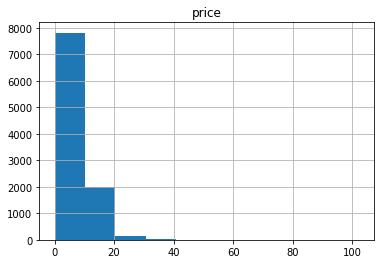

In [4]:
# Your code here
df.hist(column='price')

### Task 1.2
Is the distrubtion skewed and, if yes, positively or negatively?

In [5]:
# Your code here
print (df.skew())

price       3.341687
distance    0.833859
temp       -0.655174
rain        8.214897
weekend     0.925889
dtype: float64


*Your text here*


Yes The distrubition is skewed , Cause it's very different from the normal distrubition. And It's Positively skewed.

### Task 1.3
Create a graph that helps you to show the differences in the distribution of `price` between Uber and Lyft. How do the quartiles and the median differ for `price` between the competitors?

Hint: Limit the prices to values below the 95th percentile to be able to make a meaningful comparison.

<AxesSubplot:title={'center':'price'}, xlabel='cab_type'>

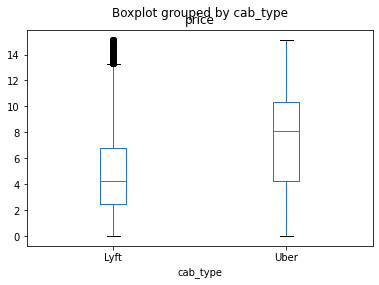

In [6]:
# Your code here
percentile=df.price.quantile(0.95)
df = df[df['price'] < percentile]  
df.boxplot(by ='cab_type', column =['price'], grid = False) 

*Your text here*

As we can see from this graph the Lyft Price distribution is way different from the uber one , the medians are not similar ( 4 for Lyft and 7.3 for Uber ) and same thing for quartiles .

### Task 1.4
What did you learn about the variable `price` from these basic descriptive statistics? Please use your own words to describe what you find interesting. You may create any additional statistics that help your argument (min. 50 words).

*Your text here*

From these descriptive statistics , I learned that the maximum price for the both cab_types is not superior than 40 , the price distibution is positively skewed as we can view from the first graph. For the box plot( Second graph) ,we observe that the values lie within the Lower and upper limit, so they are statistically considered normal and thus can be used for further observation or study.

## Task 2
Now that you have gained an inital understanding of the `price` attribute, you now want wo get insights into the relationships between the different features.

### Task 2.1
Please generate a pairplot that shows the data for Uber and Lyft in different colors.

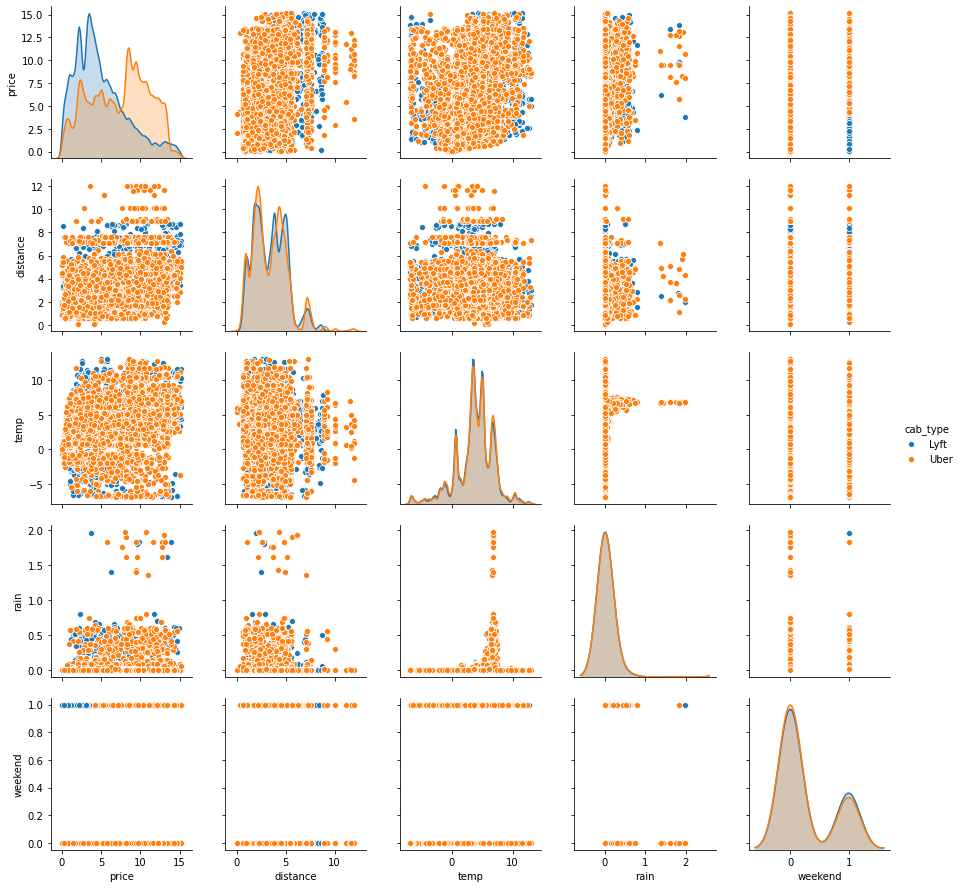

In [7]:
# Your code here
sn.pairplot(df, hue="cab_type", diag_kws={'bw': 0.2})



### Task 2.2
Please describe what you see in the pairplot. For instance, do you see any clearly visible positive or negative correlations between the variables (min. 50 words)? 

*Your text here*

the both types( Lyft and Uber ) have similar plots.So , in general we can clearly conclude that there is positive correlations between the variables. In particular , we can observe that we have some great connections between some the variables like 
temperature & distance , price & temperature , distance & price . We can say that these pairs of variables are important to work on their relation.

### Task 2.3
In addition, we want to look at correlation via a heatmap. Again, distinguishing between the two competitors. What attributes have a correlation with `price` of above 0.4? Are the correlations different between Uber and Lyft?

Note: Make sure to only include quantative attributes: 
["distance", "price", "temp", "rain", "weekend"]

<AxesSubplot:>

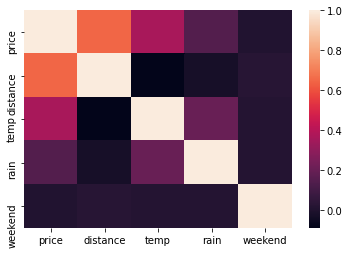

In [8]:
# Your code here
Lyft=df
Lyft.drop(Lyft.loc[Lyft['cab_type']=='Uber'].index, inplace=True)
df = pd.read_csv("Ridehailing_rides.csv")
Uber=df
Uber.drop(Uber.loc[Uber['cab_type']=='Lyft'].index, inplace=True)
Corr = Lyft.corr()
sn.heatmap(Corr)

#Lyft Heatmap

<AxesSubplot:>

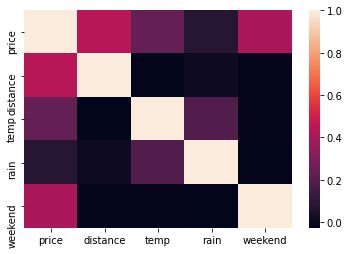

In [9]:
# Your code here
#Uber Heatmap
Corr2=Uber.corr()
sn.heatmap(Corr2)

*Your text here*

-let's mention the attributes that have a correlation with price above 0.4 : 

*for Uber : Distance

*for Lyft : Tempearature - Distance

-Yes the correlations are different between  Uber and Lyft , it is clear from the colours observed in each heatmap
 



### Task 2.4
The function `pairplot` only shows the relationship between numeric varibles in our dataset. However, we would also like to know what kind of relationship the categorical variable `ride_type` has with `price`. Please generate a categorical scatterplots that has `ride_type` on the x-axis and `price` on the y-axis. The color should indicate `ride_type`. Please describe the categorical scatterplot. What do you see? For instance, are there any visibles differences in the `prices` asked for by Lyft in comparison to Uber (min. 100 words)?

Hint: You may want to use the function `catplot` from within `seaborn`.

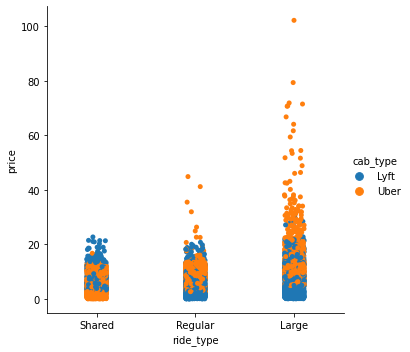

In [10]:
# Your code here
import seaborn as sn
#sn.set_theme(style="ticks")
df = pd.read_csv("Ridehailing_rides.csv")
g = sn.catplot(x="ride_type", y="price", hue="cab_type", data=df)

*Your text here*

From this Scatterplot,where Lyft is representd by the blue color and Uber by Orange Color, we can clearly view that the price for Uber is higher than the max value in Lyft , as in Lyft we don't
exceed the value 40 , however for Uber we have 80 as a maximum value. So there are clearly many visibles differences in the prices.We can also observe that for Lyft ,most of price values are in the range [1,20] , as for Uber [1,40].
So from the relation between the cab_type and Price , we can say that Uber is more costly.
We can also say that the "Large" ride_type is the most expensive one.

### Task 2.5

While the analysis of the attribute `price` offers interesting findings, you want to find out what these absolute amounts look like in proportion to `distance`. Through so called *feature engineering* you can create new features out of existing ones. Please create a new column representing the `price` per km (`distance`) payed for the individual rides and plot the average price per km through out a day.

1. What is the average for `price/km`?
2. What is the range of the `price/km`? 
3. At what time of the day do customers need to pay the highest `price/km`?

In [11]:
# Your code here
df['price/km'] = df['price'] / df['distance'] 

#1
print(df["price/km"].mean())

2.233935239670728


In [12]:
# Your code here
#2
df['price/km'].describe()

count    10001.000000
mean         2.233935
std          2.017776
min          0.009112
25%          1.155556
50%          1.782710
75%          2.692950
max         81.900000
Name: price/km, dtype: float64

In [13]:
# Your code here
#3
df.loc[df['price/km'] == df["price/km"].max()]
#So the time of the day that customers need to pay the highest is : "21:33:00"


,price,distance,cab_type,ride_type,temp,rain,weekend,time,price/km
5113,4.095,0.05,Uber,Large,5.41,0.0,0.0,21:33:00,81.9


### Task 2.6
Your employeer DenmarkRide, who wants to start up business in Copenhagen, has decided to only offer rides if the average of `price/km` is equal to or above 3.0 EUR. Taking into account the variables `ride_type`, `temp`, `rain`, `weekend`, and `time`, what are three separate conditions under which this prerequisite is met?

Hint: You may use whatever technique (e.g., visualization) you want, but please document what you did.

In [14]:
# Your code here
df=df[df['price/km']>3]
df.describe()

,price,distance,temp,rain,weekend,price/km
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,11.590833,2.607853,5.069286,0.047169,0.510094,4.949274
std,7.908481,1.690939,3.220447,0.184060,0.500021,2.973872
min,1.976000,0.050000,-6.860000,0.000000,0.000000,3.000395
25%,7.530500,1.460000,3.580000,0.000000,0.000000,3.487544
50%,10.232820,2.190000,5.120000,0.000000,1.000000,4.239526
75%,13.082000,3.490000,6.940000,0.000000,1.000000,5.552923
max,102.249288,12.000000,12.930000,1.980000,1.000000,81.900000


*Your text here*

From this description, we can conclude that:
 - Distance should be between 0.05 and 12.
 - Température should be between -6.86°C and 12.93°C.
 - Maximum value of rain quantity should be 1.98 cm.

## Task 3
Please use a linear regression to find the coefficients that give us the best linear fit to the parameter `price`.

Before you can proceed, you have to know how to deal with non-numeric variables in our dataset. These have to be transformed into so-called dummy variables, before we can include them in our model. A dummy variable is a variable that takes one of two values: `0` or `1`. 

For instance, if a ride was conducted by Uber, we cannot include the `cab_type` value `Uber` in our model. Instead, we transform the variable into dummy variables so that, if a ride was conducted by Uber, the dummy variable `cab_type_Uber` would be equal to `1`, and `0` otherwise. This transformation allows us to also include these categorical variables in the regression. To do this, we use the function `get_dummies` (you do not have to change any code here):

Given the multitude of columns, we will focus only on: `distance`, `ride_type`, `cab_type`, `rain`, `temp` and `weekend`. 

In [15]:
df = pd.get_dummies(df[['price', 'distance', 'cab_type', 'ride_type', 'temp', 'rain', 'weekend']], drop_first=True)

In [16]:
df.head()

,price,distance,temp,rain,weekend,cab_type_Uber,ride_type_Regular,ride_type_Shared
1,2.7280,0.63,5.09,0.00,0.0,1,1,0
12,6.2610,1.87,-1.88,0.00,0.0,1,0,0
29,9.5364,2.51,6.82,0.42,0.0,1,0,0
32,9.7500,2.27,4.89,0.00,1.0,1,0,1
40,8.3362,0.87,2.47,0.00,1.0,1,1,0


### Task 3.1
For this task, please use all remaining attributes to create your model (including the newly created dummy variables such as `ride_type_Regular`) and use `price` as the dependent variable.

In [17]:
# Your code here
from sklearn import linear_model
import statsmodels.api as sm
X = df[['distance','temp','rain','weekend','cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()
       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              3536.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:46   Log-Likelihood:                         -5623.7
No. Observations:                2031   AIC:                                  1.126e+04
Df Residuals:                    2024   BIC:                                  1.130e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
distance              3.5360      0.051     69.604      0.000       3.436       3.636
temp                  0.1691      0.026      6.604      0.000       0.119       0.219
rain                  0.7449      0.471      1.581      0.114      -0.179       1.669
weekend               2.8764      0.192     14.944      0.000       2.499       3.254
cab_type_Uber         1.2227      0.179      6.833      0.000       0.872       1.574
ride_type_Regular    -1.9989      0.227     -8.819      0.000      -2.443      -1.554
ride_type_Shared     -2.8480      0.234    -12.147      0.000      -3.308      -2.388
==============================================================================
Omnibus:                     2036.555   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180165.877
Skew:                           4.638   Prob(JB):                         0.00
Kurtosis:                      48.199   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 3.2
How much of the difference in `price` is explained by this model?

*Your text here*

As we have the p-value is less than 0.5 so the Condition H0 is verified , So we have a strong dependance between the variables.

### Task 3.3
What regressor (attribute) are associated with an increase in price? What is the regressor with the hightest coefficient? Please explain how the value should be interpreted (min. 20 words). 

*Your text here*

The attribute that associates with an increase in price : ride_type_Shared , ride_type_Regular	,weekend,rain

The regressor with the highest coefficient is : ride_type_Shared ( with absolute value ).

The statistical output displays the coded coefficients, which are the standardized coefficients. ride_type_Shared has the standardized coefficient with the largest absolute value. This measure suggests that ride_type_Shared is the most important independent variable in the regression model.

### Task 3.4
By how much does the price differ depending on the `cab_type`?

*Your text here*

Depending on the cab_type , the price differ by " 2.6959"

### Task 3.5
What regressor has the highest and which one the lowest impact on R-squared?

Hint: Remove the regressiors from the model one by one. 

In [18]:
# Your code here
X = df[['temp','rain','weekend','cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                              978.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:47   Log-Likelihood:                         -6864.5
No. Observations:                2031   AIC:                                  1.374e+04
Df Residuals:                    2025   BIC:                                  1.377e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
temp                  1.0579      0.041     25.890      0.000       0.978       1.138
rain                  2.7484      0.866      3.174      0.002       1.050       4.447
weekend               6.6405      0.340     19.518      0.000       5.973       7.308
cab_type_Uber         5.1031      0.313     16.297      0.000       4.489       5.717
ride_type_Regular    -5.4037      0.408    -13.256      0.000      -6.203      -4.604
ride_type_Shared     -5.9422      0.424    -14.015      0.000      -6.774      -5.111
==============================================================================
Omnibus:                     1559.595   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46552.285
Skew:                           3.339   Prob(JB):                         0.00
Kurtosis:                      25.483   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Your code here
X = df[['rain','weekend','cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              781.7
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:47   Log-Likelihood:                         -7154.9
No. Observations:                2031   AIC:                                  1.432e+04
Df Residuals:                    2026   BIC:                                  1.435e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
rain                  7.0997      0.980      7.246      0.000       5.178       9.021
weekend               6.0312      0.391     15.407      0.000       5.263       6.799
cab_type_Uber         9.5930      0.301     31.901      0.000       9.003      10.183
ride_type_Regular    -4.2439      0.467     -9.082      0.000      -5.160      -3.327
ride_type_Shared     -2.8411      0.469     -6.056      0.000      -3.761      -1.921
==============================================================================
Omnibus:                     1336.068   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22664.347
Skew:                           2.851   Prob(JB):                         0.00
Kurtosis:                      18.340   Cond. No.                         6.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Your code here
X = df[['weekend','cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              940.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:47   Log-Likelihood:                         -7180.9
No. Observations:                2031   AIC:                                  1.437e+04
Df Residuals:                    2027   BIC:                                  1.439e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
weekend               5.9382      0.396     14.988      0.000       5.161       6.715
cab_type_Uber         9.8605      0.302     32.628      0.000       9.268      10.453
ride_type_Regular    -4.0531      0.472     -8.579      0.000      -4.980      -3.127
ride_type_Shared     -2.6708      0.474     -5.629      0.000      -3.601      -1.740
==============================================================================
Omnibus:                     1305.011   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20389.219
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      17.486   Cond. No.                         3.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Your code here
X = df[['cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              1061.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:48   Log-Likelihood:                         -7287.6
No. Observations:                2031   AIC:                                  1.458e+04
Df Residuals:                    2028   BIC:                                  1.460e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
cab_type_Uber        12.5816      0.255     49.424      0.000      12.082      13.081
ride_type_Regular    -2.9810      0.492     -6.058      0.000      -3.946      -2.016
ride_type_Shared     -0.2314      0.470     -0.493      0.622      -1.152       0.690
==============================================================================
Omnibus:                     1275.844   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18090.631
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Your code here
X = df[['ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.141
Method:                 Least Squares   F-statistic:                              168.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                    2.32e-68
Time:                        18:00:48   Log-Likelihood:                         -8090.4
No. Observations:                2031   AIC:                                  1.618e+04
Df Residuals:                    2029   BIC:                                  1.620e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ride_type_Regular     9.3348      0.630     14.820      0.000       8.100      10.570
ride_type_Shared      7.1485      0.661     10.817      0.000       5.852       8.445
==============================================================================
Omnibus:                      983.229   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10182.424
Skew:                           2.025   Prob(JB):                         0.00
Kurtosis:                      13.194   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Your code here
X = df[['ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):              0.049
Method:                 Least Squares   F-statistic:                              105.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                    3.43e-24
Time:                        18:00:48   Log-Likelihood:                         -8194.7
No. Observations:                2031   AIC:                                  1.639e+04
Df Residuals:                    2030   BIC:                                  1.640e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ride_type_Shared     7.1485      0.696     10.278      0.000       5.784       8.513
==============================================================================
Omnibus:                     1176.403   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18654.676
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                      17.049   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Your text here*

The regressor that has the highest impact on R-squared is : "cab_type".

The regressor that has the the lowest impact on R-squared is : "Rain" .


## Task 4

We would now like to judge the quality of the model based on the distribution of the residuals.

### Task 4.1

Please generate a histogram of the distribution of the residuals.

In [ ]:
!conda install -c districtdatalabs yellowbrick

In [24]:
# Your code here
X = df[['temp','rain','weekend','cab_type_Uber','ride_type_Regular','ride_type_Shared']] 
Y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regressor_OLS=sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                              978.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:01:03   Log-Likelihood:                         -6864.5
No. Observations:                2031   AIC:                                  1.374e+04
Df Residuals:                    2025   BIC:                                  1.377e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
temp                  1.0579      0.041     25.890      0.000       0.978       1.138
rain                  2.7484      0.866      3.174      0.002       1.050       4.447
weekend               6.6405      0.340     19.518      0.000       5.973       7.308
cab_type_Uber         5.1031      0.313     16.297      0.000       4.489       5.717
ride_type_Regular    -5.4037      0.408    -13.256      0.000      -6.203      -4.604
ride_type_Shared     -5.9422      0.424    -14.015      0.000      -6.774      -5.111
==============================================================================
Omnibus:                     1559.595   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46552.285
Skew:                           3.339   Prob(JB):                         0.00
Kurtosis:                      25.483   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


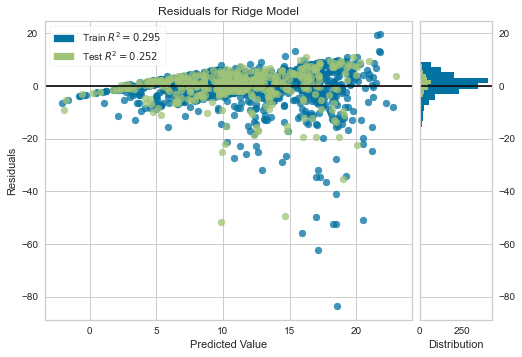

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
# Your code here
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


from yellowbrick.regressor import ResidualsPlot




# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure